In [1]:
import numpy as np
import keras
from keras.models import load_model, Model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from keras.layers import Dense

import matplotlib.pyplot as plt

import scipy.io

import os

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
HANDS_DATASET = '../data/original/hand_dataset'

IMAGE_TEST_DIR = os.path.join(HANDS_DATASET, 'test_dataset/test_data')
IMAGE_VALIDATION_DIR = os.path.join(HANDS_DATASET, 'validation_dataset/validation_data')
IMAGE_TRAIN_DIR = os.path.join(HANDS_DATASET, 'training_dataset/training_data')

IMAGE_SHAPE=(200, 200, 3)

In [3]:
conv_base = load_model('../data/models/2018-10-09 20:54:49___0.940677957009461.h5')

In [4]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)       147584    
__________

In [5]:
# Create new model
# Get input
new_input = conv_base.input
# Find the layer to connect
hidden_layer = conv_base.layers[-2].output
# Connect a new layer on it
new_output = Dense(2) (hidden_layer)
# Build a new model
model = Model(new_input, new_output)

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5_input (InputLayer)  (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
__________

## TODO:
- Load a single image
- Load all annotations
- Draw the square around image
- Make sure they line up

In [7]:
def load_matlab(file):
    f = scipy.io.loadmat(file)
    #print(f.keys())
    #print(f['boxes'])
    #print(f)
    data = f.get('boxes')
    data = np.array(data)

    return data

load_matlab('/Users/kjprice/Library/Projects/smu/capstone/data/original/hand_dataset/validation_dataset/validation_data/annotations/Movie_4weds_1.mat')


array([[array([[(array([[307.84303723, 440.70895047]]), array([[316.84527446, 455.12975921]]), array([[336.4816381 , 442.87169469]]), array([[327.47940086, 428.45088595]]), array(['L'], dtype='<U1'), array([], shape=(0, 0), dtype=uint8))]],
      dtype=[('a', 'O'), ('b', 'O'), ('c', 'O'), ('d', 'O'), ('handtype', 'O'), ('truncated', 'O')]),
        array([[(array([[299.02385059, 576.01146474]]), array([[316.31381175, 562.4078901 ]]), array([[298.54757798, 539.82724494]]), array([[281.25761682, 553.43081958]]), array(['R'], dtype='<U1'), array([], shape=(0, 0), dtype=uint8))]],
      dtype=[('a', 'O'), ('b', 'O'), ('c', 'O'), ('d', 'O'), ('handtype', 'O'), ('truncated', 'O')]),
        array([[(array([[326.80675948, 634.30918202]]), array([[340.89453922, 651.20694702]]), array([[363.33609766, 632.4972696 ]]), array([[349.24831792, 615.5995046 ]]), array(['L'], dtype='<U1'), array([], shape=(0, 0), dtype=uint8))]],
      dtype=[('a', 'O'), ('b', 'O'), ('c', 'O'), ('d', 'O'), ('handtype',

In [8]:
a = '.bob'
a.find('.') == 0

True

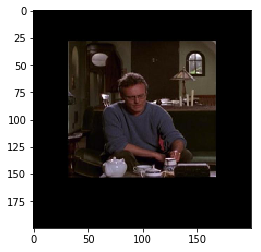

In [9]:
def load_images_as_np(directory):
    annotations_dir = os.path.join(directory, 'annotations')
    annotations = os.listdir(annotations_dir)
    
    images_dir = os.path.join(directory, 'images')
    images = os.listdir(images_dir)
    
    input_shape = (IMAGE_SHAPE[2], IMAGE_SHAPE[1], IMAGE_SHAPE[0])

    x_dataset = np.ndarray(shape=((len(images),) + IMAGE_SHAPE),
                     dtype=np.float32)
    
    y_dataset = []
    
    for annotation_file in annotations:
        # ignore config files
        if annotation_file.find('.') == 0:
            continue
        matlab_filepath = os.path.join(annotations_dir, annotation_file)
        matlab_file_data = load_matlab(matlab_filepath)
        y_dataset.append(matlab_file_data)

    i = 0
    for _file in images:
        # ignore config files
        if _file.find('.') == 0:
            continue
        filepath = os.path.join(images_dir, _file)
        img = load_img(filepath, target_size=(IMAGE_SHAPE[0], IMAGE_SHAPE[1]))  # this is a PIL image
        # Convert to Numpy Array
        if i ==0:
            plt.imshow(img)
        x = img_to_array(img)  
        x = x.reshape((1,) + IMAGE_SHAPE)
        x_dataset[i] = x
        i += 1
        break
        if i % 250 == 0:
            print("%d images to array" % i)
            
    return x_dataset, y_dataset
x, y = load_images_as_np(IMAGE_TRAIN_DIR)

In [10]:
y[0][0][1]

array([[(array([[449.81237318, 397.24488989]]), array([[462.18762682, 426.75511011]]), array([[493.18762682, 413.75511011]]), array([[480.81237318, 384.24488989]]))]],
      dtype=[('a', 'O'), ('b', 'O'), ('c', 'O'), ('d', 'O')])

In [11]:


def create_data_generator():
    # All images will be rescaled by 1./255
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
    )
    validation_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow(
            # This is the target directory
            IMAGE_TRAIN_DIR,
            batch_size=20,)

    validation_generator = validation_datagen.flow(
            IMAGE_VALIDATION_DIR,
            batch_size=20,)
    
    return [train_generator, validation_generator]

create_data_generator()

ValueError: could not convert string to float: '../data/original/hand_dataset/training_dataset/training_data'